In [1]:
#!pip install mlxtend

In [2]:
#import libraries
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

In [3]:
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


# Pre-processing

In [4]:
#As the data is not in transaction formation we using transaction formation
df=pd.get_dummies(titanic)
df.tail()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
2196,0,0,0,1,1,0,1,0,0,1
2197,0,0,0,1,1,0,1,0,0,1
2198,0,0,0,1,1,0,1,0,0,1
2199,0,0,0,1,1,0,1,0,0,1
2200,0,0,0,1,1,0,1,0,0,1


# Apriori algorithm

In [5]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [6]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
2,(Age_Adult),(Class_2nd),0.950477,0.129487,0.118582,0.124761,0.963505,-0.004492,0.994601
3,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085
4,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,-0.020555,0.962947
...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Class_Crew)","(Survived_No, Gender_Male)",0.402090,0.619718,0.304407,0.757062,1.221623,0.055225,1.565346
102,(Survived_No),"(Age_Adult, Gender_Male, Class_Crew)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434
103,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
104,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802


####  A leverage value 0 indecates independets Range will be in [-1,1]
####  High convict values means that the cosequent is highly dependen on the antecedent and range [0,inf]

In [7]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
69,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
64,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
97,"(Survived_No, Class_Crew)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
100,"(Age_Adult, Gender_Male)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
46,"(Age_Adult, Gender_Male)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
51,(Class_Crew),"(Age_Adult, Gender_Male)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [8]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
8,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
9,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
10,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Class_Crew)","(Survived_No, Gender_Male)",0.402090,0.619718,0.304407,0.757062,1.221623,0.055225,1.565346
102,(Survived_No),"(Age_Adult, Gender_Male, Class_Crew)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434
103,(Gender_Male),"(Survived_No, Class_Crew, Age_Adult)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
104,(Class_Crew),"(Survived_No, Gender_Male, Age_Adult)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802


In [11]:
result=list(rules)

In [12]:
result

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

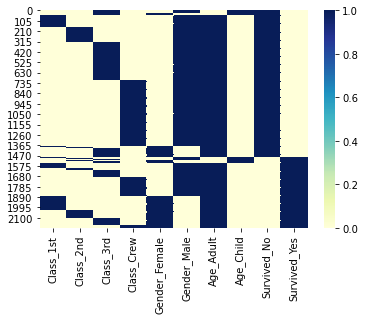

In [15]:
sns.heatmap(df,cmap='YlGnBu')